In [1]:
import sys, os
p = os.path.abspath('..')
# p = p+r'\config'
sys.path.insert(1, p)

In [2]:
import pandas as pd
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [3]:
# 파일 불러오기
with open('../../data/ann_qid.pkl', 'rb') as f:
    qdf = pickle.load(f)


In [4]:
path = './sample_result'
file_list = os.listdir(path)

In [5]:
ver = 1
date = '2024-12-04'
path = './sample_result'
sc_num = 5

In [6]:
def make_one_file(ver, date):
    opt_file = [x for x in file_list if x.endswith(f'_{ver}_{date}.csv')]

    if len(opt_file)>0 : 
        df = pd.DataFrame()
        for f in opt_file:
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            df = pd.concat([df, tmp], axis =0)
        
        return df
        



In [7]:
def pp_result(ver, date):
    opt_file = [x for x in file_list if x.endswith(f'_{ver}_{date}.csv')]

    if len(opt_file)>0 : 
        df = pd.DataFrame()
        for f in opt_file:
            tmp = pd.read_csv(f'{path}/{f}', index_col =0)
            df = pd.concat([df, tmp], axis =0)
        
        return df
        



In [8]:
df = make_one_file(ver, date)

In [9]:
df.head()

,id,message,result
0,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>0</Difficulty Level>\n
1,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>1</Difficulty Level>
2,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>1</Difficulty Level>\n
3,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>1</Difficulty Level>\n
4,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>0</Difficulty Level>\n


In [10]:
df.isna().sum()

id          0
message     0
result     12
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df['o_result'] = df['result'].apply(lambda x : re.sub(r'[^0-9]', '', x))

In [13]:
df = df[df['o_result'].isin(['1', '0', '2'])]

In [14]:
df.head()

,id,message,result,o_result
0,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>0</Difficulty Level>\n,0
1,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>1</Difficulty Level>,1
2,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>1</Difficulty Level>\n,1
3,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>1</Difficulty Level>\n,1
4,74384642,"[{'role': 'system', 'content': '\n# Python Que...",<Difficulty Level>0</Difficulty Level>\n,0


In [15]:
df['o_result'].value_counts()

o_result
1    2661
0    1136
2     697
Name: count, dtype: int64

In [16]:
chk_cnt = df.groupby(['id', 'o_result']).count().reset_index()[['id', 'o_result', 'message']]

In [17]:
chk_cnt = chk_cnt.rename(columns = {'message': 'cnt'})

In [18]:
chk_cnt = chk_cnt[chk_cnt['cnt'] == sc_num]

In [19]:
chk_cnt

,id,o_result,cnt
0,73918802,0,5
1,73918849,1,5
2,73918869,1,5
3,73918893,0,5
4,73918967,0,5
...,...,...,...
1172,74953548,1,5
1173,74953559,1,5
1176,74953599,1,5
1179,74953917,1,5


In [20]:
m_chk_cnt = pd.merge(chk_cnt, qdf, on = 'id')

In [21]:
m_chk_cnt.head()

,id,o_result,cnt,creationdate
0,73918802,0,5,2022-10-01 13:48:24.653
1,73918849,1,5,2022-10-01 13:55:32.917
2,73918869,1,5,2022-10-01 13:57:28.427
3,73918893,0,5,2022-10-01 14:01:03.843
4,73918967,0,5,2022-10-01 14:09:03.393


In [22]:
m_chk_cnt['creation_year'] = pd.to_datetime(m_chk_cnt['creationdate']).dt.year
m_chk_cnt['creation_month'] = pd.to_datetime(m_chk_cnt['creationdate']).dt.month
m_chk_cnt['creation_day'] = pd.to_datetime(m_chk_cnt['creationdate']).dt.day
m_chk_cnt['creation_date'] = pd.to_datetime(m_chk_cnt['creationdate']).dt.date

In [23]:
m_chk_cnt.head(10)

,id,o_result,cnt,creationdate,creation_year,creation_month,creation_day,creation_date
0,73918802,0,5,2022-10-01 13:48:24.653,2022,10,1,2022-10-01
1,73918849,1,5,2022-10-01 13:55:32.917,2022,10,1,2022-10-01
2,73918869,1,5,2022-10-01 13:57:28.427,2022,10,1,2022-10-01
3,73918893,0,5,2022-10-01 14:01:03.843,2022,10,1,2022-10-01
4,73918967,0,5,2022-10-01 14:09:03.393,2022,10,1,2022-10-01
5,73919032,1,5,2022-10-01 14:17:04.077,2022,10,1,2022-10-01
6,73919262,1,5,2022-10-01 14:47:57.533,2022,10,1,2022-10-01
7,73919321,0,5,2022-10-01 14:57:19.183,2022,10,1,2022-10-01
8,73921712,0,5,2022-10-01 20:58:45.580,2022,10,1,2022-10-01
9,73921753,0,5,2022-10-01 21:07:55.157,2022,10,1,2022-10-01


In [24]:
m_chk_cnt = m_chk_cnt.groupby(['creation_date', 'o_result']).count().reset_index()[['creation_date'	,'o_result',	'id']]

In [25]:
tot_df = m_chk_cnt.groupby(['creation_date']).sum().reset_index()[['creation_date', 'id']]

In [26]:
tot_df = tot_df.rename(columns={'id':'tot'})

In [27]:
m_chk_cnt = pd.merge(m_chk_cnt, tot_df, on = 'creation_date')

In [28]:
m_chk_cnt['rate'] = m_chk_cnt['id']/m_chk_cnt['tot']*100

In [29]:
m_chk_cnt = m_chk_cnt.set_index('creation_date')

In [30]:
m_chk_cnt_0 = m_chk_cnt[m_chk_cnt['o_result'] =='0']
m_chk_cnt_1 = m_chk_cnt[m_chk_cnt['o_result'] =='1']
m_chk_cnt_2 = m_chk_cnt[m_chk_cnt['o_result'] =='2']

In [31]:
m_chk_cnt_0.head()

,o_result,id,tot,rate
creation_date,,,,
2022-10-01,0,7,13,53.846154
2022-10-02,0,2,8,25.000000
2022-10-03,0,4,6,66.666667
2022-10-05,0,1,7,14.285714
2022-10-06,0,1,7,14.285714


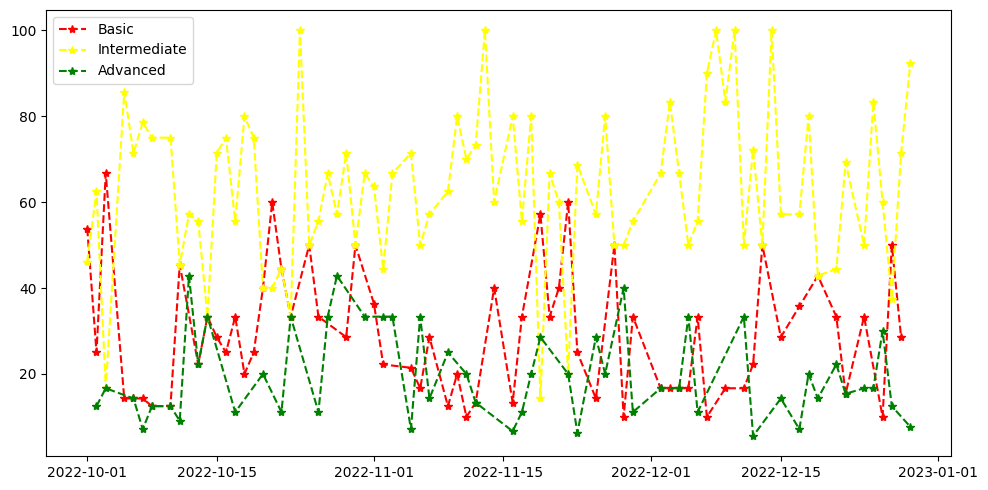

In [32]:
fig, ax = plt.subplots( figsize = (10, 5), sharey=True, sharex=True)

ax.plot(m_chk_cnt_0.rate, # specify data
        color = 'red',
        label = 'Basic',
        marker='*',
        linestyle='--',
) 

ax.plot(m_chk_cnt_1.rate, # specify data
        color = 'yellow',
        label = 'Intermediate',
        marker='*',
        linestyle='--',
) 


ax.plot(m_chk_cnt_2.rate, # specify data
        color = 'green',
        label = 'Advanced',
        marker='*',
        linestyle='--',
) 

ax.legend(loc = 'upper left', fontsize = 10) # add legend

plt.tight_layout()  
# plt.yscale('log');
# plt.xscale('log');
plt.show();